# 03 · Mejoras (opcional)
Experimenta con ingeniería de variables y modelos alternativos.
## Asistencia de IA
- ¿Qué pediste?
- ¿Qué te propuso la IA?
- ¿Qué decidiste y por qué?


In [5]:
# Ejemplo: RandomForestRegressor + búsqueda simple de hiperparámetros
from sklearn.ensemble import RandomForestRegressor
from sklearn.model_selection import GridSearchCV
from sklearn.datasets import fetch_california_housing
from sklearn.model_selection import train_test_split
X, y = fetch_california_housing(return_X_y=True, as_frame=True)
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)
grid = GridSearchCV(RandomForestRegressor(random_state=42),
                    param_grid={"n_estimators":[50,100],"max_depth":[None,10,20]},
                    cv=3, n_jobs=-1)
grid.fit(X_train, y_train)
grid.best_params_, grid.best_score_

({'max_depth': 20, 'n_estimators': 100}, np.float64(0.8005482207090638))

## Escalado + Regresión Lineal


In [6]:
from sklearn.datasets import fetch_california_housing
from sklearn.model_selection import train_test_split
from sklearn.pipeline import Pipeline
from sklearn.preprocessing import StandardScaler
from sklearn.linear_model import LinearRegression
from sklearn.metrics import mean_squared_error, mean_absolute_error, r2_score
import numpy as np

# 1. Cargar dataset
X, y = fetch_california_housing(return_X_y=True, as_frame=True)

# 2. Dividir en train/test
X_train, X_test, y_train, y_test = train_test_split(
    X, y, test_size=0.2, random_state=42
)

# 3. Crear pipeline y entrenar
pipe_lin = Pipeline([
    ('scaler', StandardScaler()),
    ('model', LinearRegression())
])

pipe_lin.fit(X_train, y_train)
preds_scaled = pipe_lin.predict(X_test)

# 4. Calcular métricas

mse_scaled = mean_squared_error(y_test, preds_scaled)  # MSE
rmse_scaled = np.sqrt(mse_scaled)  # RMSE
mae_scaled  = mean_absolute_error(y_test, preds_scaled)
r2_scaled   = r2_score(y_test, preds_scaled)

rmse_scaled, mae_scaled, r2_scaled

(np.float64(0.7455813830127764), 0.5332001304956564, 0.5757877060324508)

## Random Forest

<Axes: >

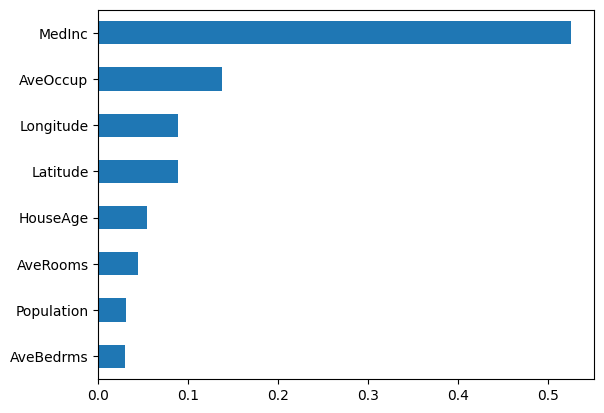

In [7]:
from sklearn.ensemble import RandomForestRegressor
from sklearn.metrics import mean_squared_error, mean_absolute_error, r2_score

rf = RandomForestRegressor(
    n_estimators=300, max_depth=None, random_state=42, n_jobs=-1
)
rf.fit(X_train, y_train)

preds_rf = rf.predict(X_test)
mse_rf  = mean_squared_error(y_test, preds_rf)
rmse_rf = mse_rf ** 0.5
mae_rf  = mean_absolute_error(y_test, preds_rf)
r2_rf   = r2_score(y_test, preds_rf)
rmse_rf, mae_rf, r2_rf
import pandas as pd
imp = pd.Series(rf.feature_importances_, index=X.columns).sort_values(ascending=True)
imp.plot(kind='barh')

In [8]:
rmse_rf, mae_rf, r2_rf

(0.5034218492503684, 0.32660672448320444, 0.8065996475063295)

In [9]:
##Probamos con GridSearchCV
from sklearn.ensemble import RandomForestRegressor #Importamos el modelo Forest Regressor
from sklearn.model_selection import GridSearchCV #Importamos el GridSearchCV
from sklearn.metrics import mean_squared_error, mean_absolute_error, r2_score
import numpy as np
import pandas as pd

# 1) Definimos el modelo base
rf = RandomForestRegressor(random_state=42, n_jobs=-1)

# 2) Espacio de búsqueda (pequeño para no tardar demasiado)
param_grid = {
    "n_estimators": [200, 400],
    "max_depth": [None, 12, 20],
    "min_samples_split": [2, 5],
    "min_samples_leaf": [1, 2]
}

# 3) GridSearchCV con validación cruzada
grid = GridSearchCV(
    estimator=rf,
    param_grid=param_grid,
    cv=3,
    scoring="neg_root_mean_squared_error",  # usa RMSE (negativo)
    n_jobs=-1,
    verbose=1
)

grid.fit(X_train, y_train)

print("Mejores hiperparámetros:", grid.best_params_)
print("RMSE (CV) con esos params:", -grid.best_score_)

# 4) Reentrenar en train con los mejores parámetros y evaluar en test
best_rf = RandomForestRegressor(random_state=42, n_jobs=-1, **grid.best_params_)
best_rf.fit(X_train, y_train)

preds_best = best_rf.predict(X_test)

mse_best  = mean_squared_error(y_test, preds_best)   # MSE
rmse_best = np.sqrt(mse_best)                        # RMSE
mae_best  = mean_absolute_error(y_test, preds_best)
r2_best   = r2_score(y_test, preds_best)

rmse_best, mae_best, r2_best

Fitting 3 folds for each of 24 candidates, totalling 72 fits
Mejores hiperparámetros: {'max_depth': 20, 'min_samples_leaf': 1, 'min_samples_split': 2, 'n_estimators': 400}
RMSE (CV) con esos params: 0.5136511005402299


(np.float64(0.5029991264046748), 0.32617030964805854, 0.8069243073231187)

In [ ]:
from pathlib import Path
import json
import pandas as pd
import matplotlib.pyplot as plt

# Crear carpeta reports si no existe
Path("reports").mkdir(parents=True, exist_ok=True)

# 1️⃣ Guardar métricas Random Forest normal
metrics_rf = {
    "RMSE": float(rmse_rf),
    "MAE": float(mae_rf),
    "R2": float(r2_rf)
}
with open("reports/metrics_rf.json", "w") as f:
    json.dump(metrics_rf, f, indent=2)

# 2️⃣ Guardar métricas Random Forest optimizado
metrics_best_rf = {
    "RMSE": float(rmse_best),
    "MAE": float(mae_best),
    "R2": float(r2_best),
    "Best Params": grid.best_params_
}
with open("reports/metrics_best_rf.json", "w") as f:
    json.dump(metrics_best_rf, f, indent=2)

# 3️⃣ Guardar importancias de variables del mejor modelo
importances = pd.Series(best_rf.feature_importances_, index=X.columns).sort_values(ascending=True)
ax = importances.plot(kind='barh', figsize=(8,6))
ax.set_title("Feature Importances - Random Forest (Best Model)")
plt.tight_layout()
plt.savefig("reports/feature_importances_best_rf.png")
plt.close()

print("✅ Resultados guardados en la carpeta 'reports'")


✅ Resultados guardados en la carpeta 'reports'


: 